Quiz Title: Bitcoin Price Forecasting with ARIMA

Quiz Description:

First collect bitcoin price from 2022-01-01T00:00:00Z till 2022-12-01T23:59:59Z within 1 hour interval you can use wallex or nobitex or coinbase.com or ...

Then Your task is to use the ARIMA (AutoRegressive Integrated Moving Average) model to forecast the price of Bitcoin for a future period accoarding to data that you collected.

Question 1: Perform a visual analysis of the dataset. Plot the time series of Bitcoin prices over the 12 months.

Question 2: Before applying ARIMA, what steps would you take to make the time series stationary? Do them all

Question 3: Apply the ARIMA model to the dataset. Choose appropriate values for p, d, and q.

Question 4: Forecast the Bitcoin price for the next 3 hours using your ARIMA model.

Question 5: Evaluate the performance of your ARIMA model. Calculate and explain appropriate evaluation metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for your forecast.

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import sklearn
import statsmodels.api as sm
import json



In [3]:

symbol = 'BTCUSDT'
fromts = int(datetime(year=2022,month=1,day=1).timestamp())
tots = int(datetime(2022,12,2).timestamp())

raw = f'https://api.wallex.ir/v1/udf/history?symbol={symbol}&resolution=60&from={fromts}&to={tots}'

req = requests.get(raw)
req

<Response [200]>

In [5]:
print(fromts ,tots)
t = datetime.fromtimestamp(1670185800)
t

1640982600 1669926600


datetime.datetime(2022, 12, 5, 0, 0)

In [22]:
data = req.json()
btc = pd.DataFrame(data)
btc
btc.pop("v")
btc.pop("s")
btc = btc.applymap(lambda x: int(round(float(x))))
btc.t = btc.t.apply(lambda x: datetime.fromtimestamp(x))
btc

,t,c,o,h,l
0,2022-01-01 00:30:00,46850,46850,46850,46850
1,2022-01-01 01:30:00,46657,47266,47266,46400
2,2022-01-01 02:30:00,46000,46100,46177,46000
3,2022-01-01 03:30:00,45800,45900,45900,45800
4,2022-01-01 04:30:00,46146,46125,46156,45946
...,...,...,...,...,...
7890,2022-12-01 19:30:00,17003,17000,17019,16988
7891,2022-12-01 20:30:00,17003,17003,17003,17003
7892,2022-12-01 21:30:00,17003,17003,17003,17003
7893,2022-12-01 22:30:00,17000,17000,17000,17000


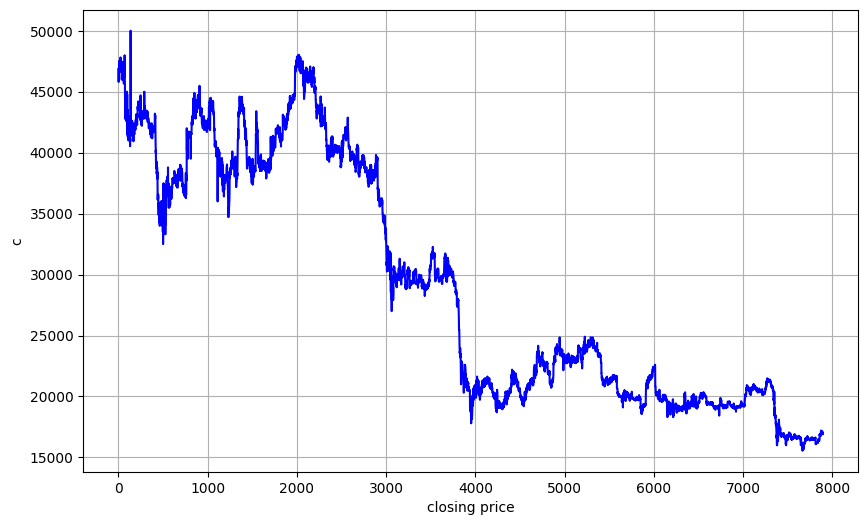

In [23]:

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("closing price")
plt.ylabel("c")
plt.plot(btc["c"], 'blue',label='Train data')


# train section


In [18]:
train_data = list(btc["c"])
len(train_data)

7895

In [21]:
model_prediction = []

for i in range(3):
    model = sm.tsa.ARIMA(train_data,order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    print(output[0])
    model_prediction.append(output[0])
    train_data.append((output[0]))
    
    
    



ValueError: `order` argument must be an iterable with three elements.

In [ ]:
model_prediction

[16943.719503200886,
 16944.695604075612,
 16943.07251830493,
 16945.24004273245,
 16943.919317727443,
 16944.10199881458,
 16944.195939701953,
 16944.112071839114,
 16944.161558262556,
 16944.148074899178]

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8013
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -57770.800
Date:                Sun, 08 Oct 2023   AIC                         115551.600
Time:                        19:41:14   BIC                         115586.544
Sample:                             0   HQIC                        115563.560
                               - 8013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3259      0.003   -107.518      0.000      -0.332      -0.320
ar.L2         -0.1183      0.005    -22.640      0.000      -0.129      -0.108
ar.L3         -0.0225      0.006     -3.985      0.000      -0.034      -0.011
ar.L4         -0.0283      0.006     -4.373      0.000      -0.041      -0.016
sigma2      1.071e+05    397.747    269.291      0.000    1.06e+05    1.08e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):           1567890.76
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        71.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

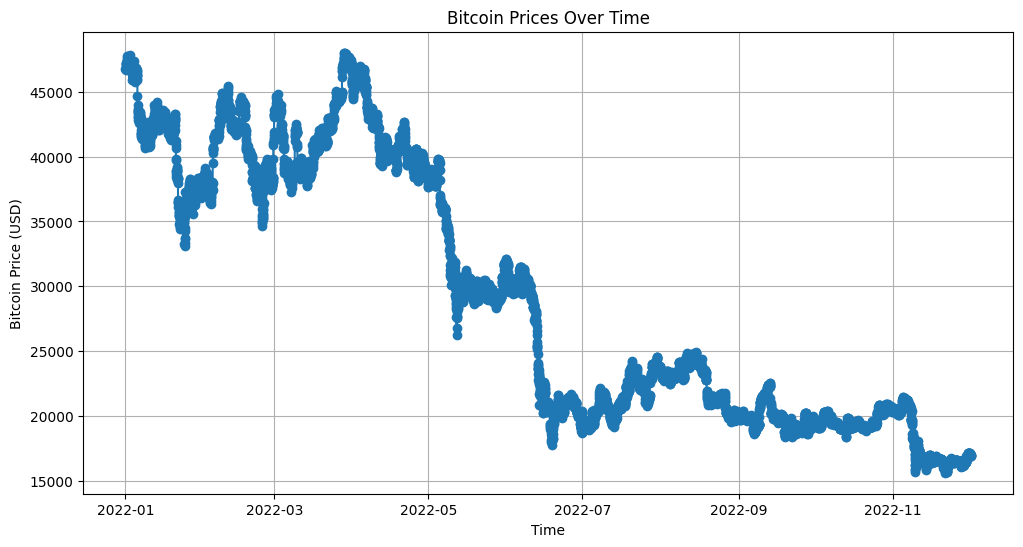

<Figure size 1200x600 with 0 Axes>

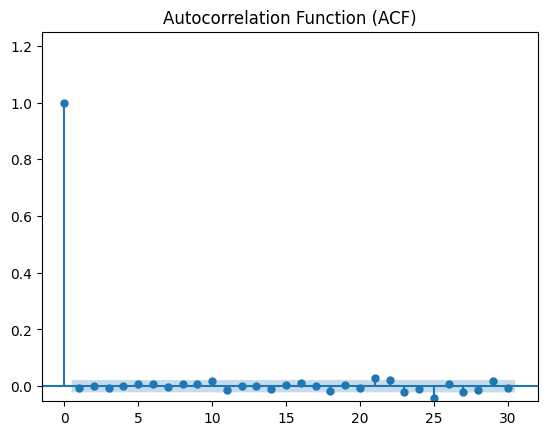

<Figure size 1200x600 with 0 Axes>

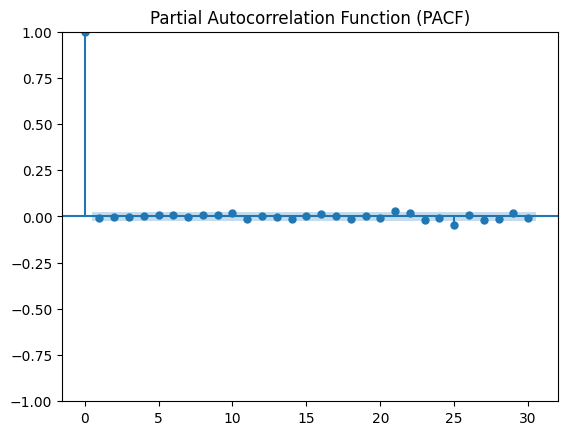

Forecas
8040    16980.024118
dtype: float64
Forecas
8040    16980.024118
dtype: float64
Forecas
8040    16980.024118
dtype: float64
Forecast for the next 3 hour (USD):
[8040    16980.024118
dtype: float64, 8040    16980.024118
dtype: float64, 8040    16980.024118
dtype: float64]
[16923.77 16967.91 16980.08]

Model Evaluation:
hour 1:
MAE: 56.25 USD
RMSE: 56.25 USD
hour 2:
MAE: 12.11 USD
RMSE: 12.11 USD
hour 3:
MAE: 0.06 USD
RMSE: 0.06 USD
